In [1]:
from modeconvertor.animation import test_movie
from modeconvertor.movie import read_grayscale
from modeconvertor.animation import MoviePlayer
from modeconvertor import Converter,Cone
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib ipympl

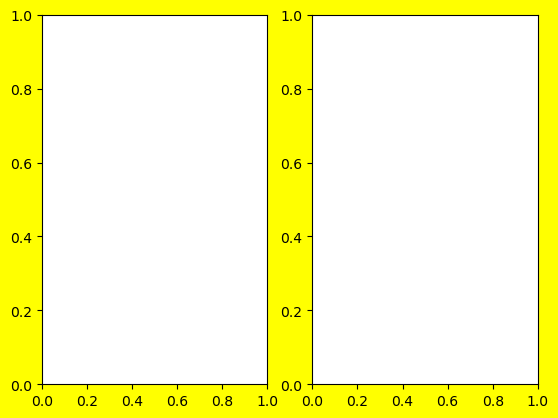

In [2]:

mov =test_movie(100,256,256)
def plot_hook(ax_b,ax_m,video):
    SLcoords= np.array([[0,255],[255,0]])
    mc = Converter(anchor_idx=len(video)//2,movies=video,SLcoords=SLcoords,SR=1,W=128,A=0,S=0,R=0)
    amm = mc.amm()
    
    bSL = mc.perSL()
    mSL = mc.mSL()
    mpred_coords_y = np.array([80,120,150,200]).reshape(4,)
    mpred_coords_x = np.full((4,),mc.mSLx())
    mpred_coords   = np.stack([mpred_coords_y,mpred_coords_x],axis=-1)
    bpred_coords   = mc.pred_bcoords(mpred_coords)

    ax_m.imshow(amm,cmap='gray')
    ax_b.scatter(bSL[:,1],bSL[:,0],marker='d',color='0.8')
    ax_b.plot(bpred_coords[:,1],bpred_coords[:,0],'-x',color='red',markersize=10)

    ax_m.scatter(mSL[:,1],mSL[:,0],marker='d',color='0.8')
    ax_m.plot(mpred_coords[:,1],mpred_coords[:,0],'-x',color='red',markersize=10)
    

player = MoviePlayer(mov)
player.register(plot_hook)
player.play()

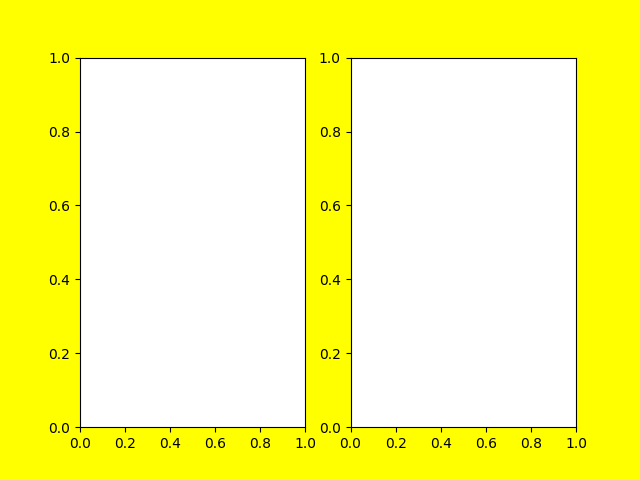

In [7]:

mov = read_grayscale('./data/echotest.avi')
def plot_hook(ax_b,ax_m,video):
    c = Cone(video)
    SLcoords = c.left(angle=30)
    mc = Converter(anchor_idx=len(video)//2,movies=video,SLcoords=SLcoords,SR=1,W=128,A=0,S=0,R=0,num_pts=600)
    amm = mc.amm()
    
    bSL = mc.perSL()
    mSL = mc.mSL()
    mpred_coords_y = np.array([200,300,400,500]).reshape(4,)
    mpred_coords_x = np.full((4,),mc.mSLx())
    mpred_coords   = np.stack([mpred_coords_y,mpred_coords_x],axis=-1)
    bpred_coords   = mc.pred_bcoords(mpred_coords)

    ax_m.imshow(amm,cmap='gray')
    ax_b.scatter(bSL[:,1],bSL[:,0],marker='d',color='0.8')
    ax_b.plot(bpred_coords[:,1],bpred_coords[:,0],'-x',color='red',markersize=10)

    ax_m.scatter(mSL[:,1],mSL[:,0],marker='d',color='0.8')
    ax_m.plot(mpred_coords[:,1],mpred_coords[:,0],'-x',color='red',markersize=10)
    

player = MoviePlayer(mov)
player.register(plot_hook)
player.play()